#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mlp
mlp.rcParams.update({'font.size': 15})

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

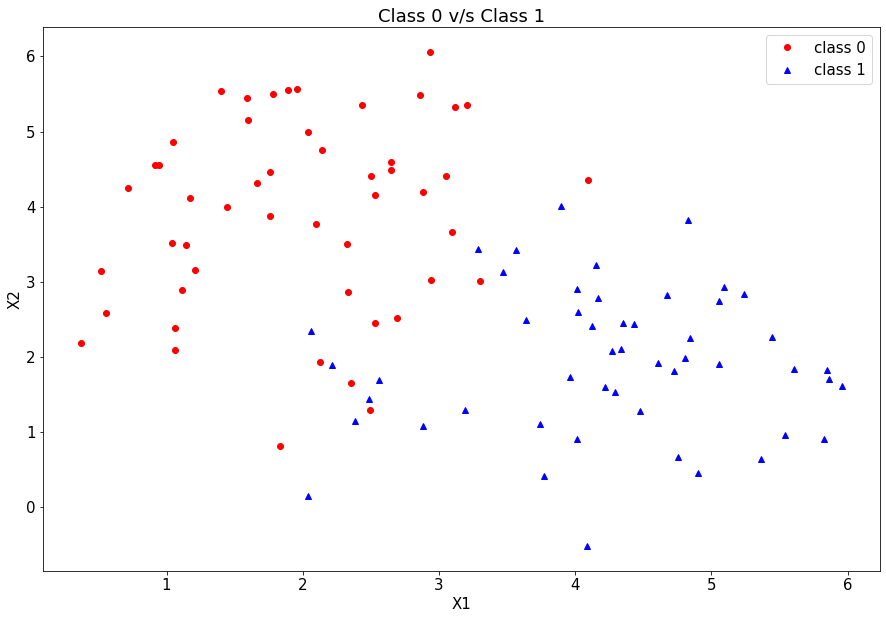

In [3]:
#Visualize dataset 
plt.figure(figsize = (15, 10))
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red', label = "class 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue', label = "class 1")
plt.xlabel("X1"); plt.ylabel("X2")
plt.legend(loc = "best")
plt.title("Class 0 v/s Class 1")
plt.show()

### Logistic Regression Classification...

In [9]:
class LogisticRegression:
    # Define constructor...
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        # Learning rate...
        self.lr = lr
        # Number of iteration...
        self.num_iter = num_iter
        # Boolean variable... if to add intercept...
        self.fit_intercept = fit_intercept
        # If you want to show the result...
        self.verbose = verbose
    
    # Add the intercept...
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    #The non-linear function...
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    # loss function...
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    # fit method...
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    # Predict the probability...
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    # predict the labels --> threshold by default is 0.5
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [10]:
# create an instance of LogisticRegression classifier...
logreg_model = LogisticRegression(lr=0.1, num_iter=300000, verbose = True)

# Fit the model to training data...
logreg_model.fit(X, y)

# Predict with the trained model...
# But since we just want Thetas there is no need to predict
#preds = model.predict(X)

# Obtain the fitted parameters...
fit_params = logreg_model.theta

loss: 0.6389532253208319 	
loss: 0.1410096008419725 	
loss: 0.14068701018816002 	
loss: 0.1406775909167708 	
loss: 0.1406772738760588 	
loss: 0.14067726293835944 	
loss: 0.14067726255930021 	
loss: 0.14067726254615237 	
loss: 0.1406772625456963 	
loss: 0.14067726254568047 	
loss: 0.1406772625456799 	
loss: 0.14067726254567992 	
loss: 0.14067726254567992 	
loss: 0.1406772625456799 	
loss: 0.14067726254567983 	
loss: 0.14067726254567986 	
loss: 0.14067726254567992 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	
loss: 0.14067726254567986 	


In [11]:
#Print the parameters...
print(f"Parameters obtained for the LogisticRegression model: beta_0 = {fit_params[0]} and beta_1 = {fit_params[1]}")

Parameters obtained for the LogisticRegression model: beta_0 = -4.868729460320768 and beta_1 = 3.5374712906224732


### Construct Decision Boundary from above `fit_params`

In [12]:
# let's plot the line in above plot...
x_range = np.arange(round(min(X[:, 0])), round(max(X[:, 1])))
y_range = -(fit_params[0] + fit_params[1]*x_range)/fit_params[2]

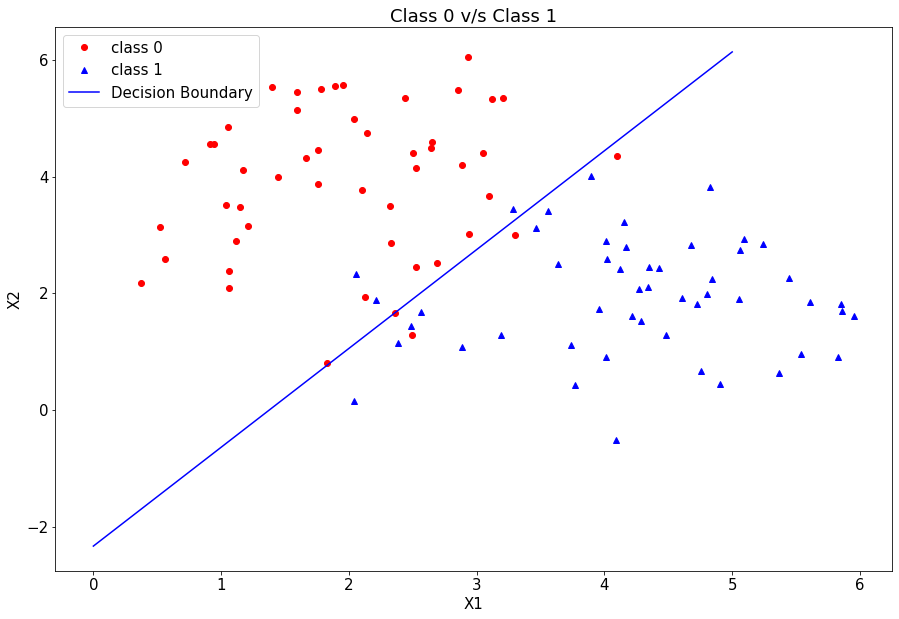

In [13]:
#Put Deciso\ion Boundary...
plt.figure(figsize = (15, 10))
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red', label = "class 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue', label = "class 1")
plt.plot(x_range, y_range, 'b-', label = "Decision Boundary")
plt.xlabel("X1"); plt.ylabel("X2")
plt.legend(loc = "best")
plt.title("Class 0 v/s Class 1")
plt.show()